In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Loading Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Preparing Data
train_data = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].dropna()

#Select Features
X = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = train_data['SalePrice']

#Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
#Calculate Metrics
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")

Mean Absolute Error : 35788.0612924363
Mean Squared Error : 2806426667.247853
R-squared : 0.6341189942328371


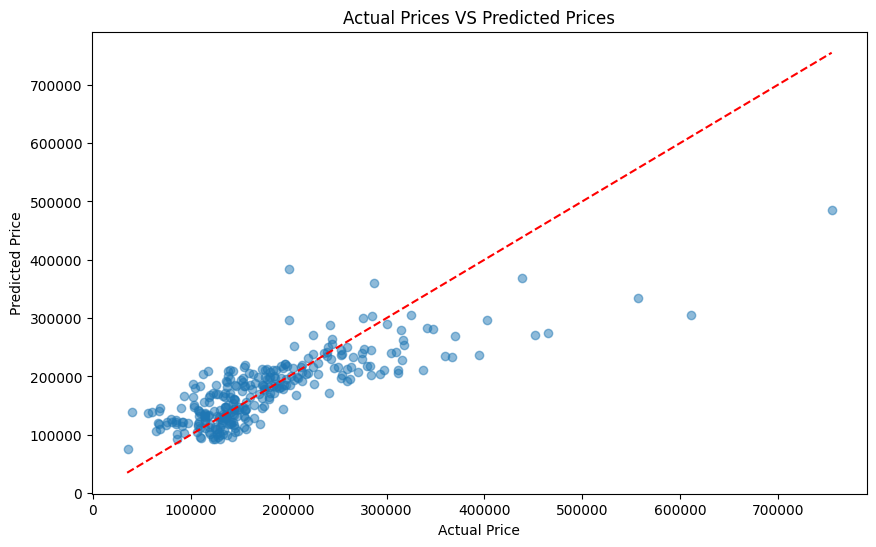

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


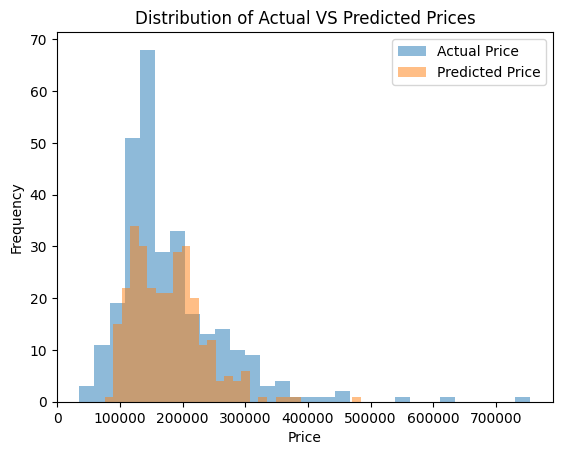

In [6]:
plt.hist(y_val, bins = 30, alpha=0.5, label='Actual Price')
plt.hist(y_pred, bins = 30, alpha=0.5, label='Predicted Price')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Actual VS Predicted Prices")
plt.legend()
plt.show()

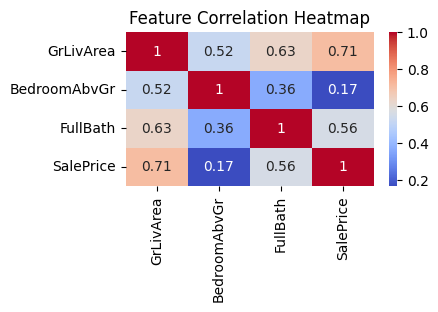

In [7]:
corr_matrix = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].corr()
plt.figure(figsize=(4, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
#Sample
example = pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'FullBath': [2],
})
example_prediction = model.predict(example)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')


# Prepare the test data and make predictions
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']].fillna(0)
test_predictions = model.predict(X_test)


# Save predictions
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

Example Prediction: $240,377.51
